In [1]:
# Importation of Data manipulation libraries
import pandas as pd
import numpy as np
# Importation of visualisation libraries
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

The Objective of this task is to predict permit issue times of various building permits so as to identify which ones matter more and also be able to draw conclusions on the city's development plans based on the San Francisco Building Permits data.
It's a Regression problems since the permit issue time will be a continuous variable.
It's a supervised Machine learning problem since we have access to the features and the target variable

In [2]:
pd.set_option('display.max_columns',None)
Pmtsdata = pd.read_csv('Building_Permits.csv',
                      index_col='Permit Number',parse_dates=['Filed Date','Issued Date'])

In [3]:
#Phase 1:Data cleaning and formatting.
Pmtsdata.head()

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,2015-05-06,2015-11-09,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,2016-04-19,2017-08-03,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,2016-05-27,NaT,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,2016-11-07,2017-07-18,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,2016-11-28,2017-12-01,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [4]:
Pmtsdata.shape

(198900, 42)

In [5]:
# Gives us some more information about the dataframe .
Pmtsdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198900 entries, 201505065519 to M864287
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Permit Type                             198900 non-null  int64         
 1   Permit Type Definition                  198900 non-null  object        
 2   Permit Creation Date                    198900 non-null  object        
 3   Block                                   198900 non-null  object        
 4   Lot                                     198900 non-null  object        
 5   Street Number                           198900 non-null  int64         
 6   Street Number Suffix                    2216 non-null    object        
 7   Street Name                             198900 non-null  object        
 8   Street Suffix                           196132 non-null  object        
 9   Unit                          

In [6]:
#Exploring missing values
missing_values_counts = Pmtsdata.isnull().sum()
print(missing_values_counts)

Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing Stories                 42784
Number of Proposed S

In [7]:
#if we were to drop columns with atleast one missing value
columns_without_missing_values= Pmtsdata.dropna(axis=1)
columns_without_missing_values.head()
#Alot of data is lost. Out of 42 columns only 11 are retained, 31 columns are lost

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
Permit Number,,,,,,,,,,,
201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,2015-05-06,1380611233945
201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,2016-04-19,1420164406718
201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,2016-05-27,1424856504716
201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,2016-11-07,1443574295566
201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,2016-11-28,144548169992


In [8]:
#if we were to drop rows with atleast one missing value
rows_without_missing_values= Pmtsdata.dropna(axis=0)
rows_without_missing_values.head()
#All the data would be lost

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [9]:
#lets explore the possibility of dropping columns by a given percentage threshold of missings values.
miss_val_per_column = Pmtsdata.isnull().sum()/len(Pmtsdata)
miss_val_per_column

Permit Type                               0.000000
Permit Type Definition                    0.000000
Permit Creation Date                      0.000000
Block                                     0.000000
Lot                                       0.000000
Street Number                             0.000000
Street Number Suffix                      0.988859
Street Name                               0.000000
Street Suffix                             0.013917
Unit                                      0.851790
Unit Suffix                               0.990141
Description                               0.001458
Current Status                            0.000000
Current Status Date                       0.000000
Filed Date                                0.000000
Issued Date                               0.075113
Completed Date                            0.511357
First Construction Document Date          0.075143
Structural Notification                   0.965199
Number of Existing Stories     

In [10]:
mis_val_centage = (miss_val_per_column*100).round(3)
mis_val_centage

Permit Type                                0.000
Permit Type Definition                     0.000
Permit Creation Date                       0.000
Block                                      0.000
Lot                                        0.000
Street Number                              0.000
Street Number Suffix                      98.886
Street Name                                0.000
Street Suffix                              1.392
Unit                                      85.179
Unit Suffix                               99.014
Description                                0.146
Current Status                             0.000
Current Status Date                        0.000
Filed Date                                 0.000
Issued Date                                7.511
Completed Date                            51.136
First Construction Document Date           7.514
Structural Notification                   96.520
Number of Existing Stories                21.510
Number of Proposed S

In [11]:
mis_val_table = pd.concat([miss_val_per_column,mis_val_centage,],axis=1)
mis_val_table

,0,1
Permit Type,0.000000,0.000
Permit Type Definition,0.000000,0.000
Permit Creation Date,0.000000,0.000
Block,0.000000,0.000
Lot,0.000000,0.000
Street Number,0.000000,0.000
Street Number Suffix,0.988859,98.886
Street Name,0.000000,0.000
Street Suffix,0.013917,1.392
Unit,0.851790,85.179


In [12]:
new_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage'})
new_table

,Missing Values,Percentage
Permit Type,0.000000,0.000
Permit Type Definition,0.000000,0.000
Permit Creation Date,0.000000,0.000
Block,0.000000,0.000
Lot,0.000000,0.000
Street Number,0.000000,0.000
Street Number Suffix,0.988859,98.886
Street Name,0.000000,0.000
Street Suffix,0.013917,1.392
Unit,0.851790,85.179


In [13]:
# set our threshold to remove columns with 80% missing values.
missing_columns = list(new_table[new_table['Percentage']>80].index)
print('We will remove %d columns'%len(missing_columns))
print('The columns to remove are \n %s'%missing_columns)

We will remove 8 columns
The columns to remove are 
 ['Street Number Suffix', 'Unit', 'Unit Suffix', 'Structural Notification', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'TIDF Compliance', 'Site Permit']


In [14]:
Pmtsdata.drop(columns=list(missing_columns),inplace=True)
#Now left with 34 columns out of 42.

In [15]:
Pmtsdata.shape

(198900, 34)

**Standard machine learning models cannot deal with missing values, and which means we have to find a way to fill these in or disard any features with missing values. Since we already removed features with more than 80% missing values in the dateframe,
we have a considerable number of rows process, we can decide to drop rows with missing values so as to remain with data which suitable to our models**.

In [16]:
Pmtsdata.dropna(axis=0,inplace=True) # we can drop rows with missing values

In [17]:
Pmtsdata.isnull().any().sum() #code shows we now have no missing values in the dataframe

0

In [18]:
Pmtsdata.shape # we are still left with a considerable chunk of data to build our models.

(86817, 34)

In [19]:
#DUPLICATE CHECK.
NewPmtdata=Pmtsdata.copy()
NewPmtdata.drop_duplicates(subset=None, inplace=True)

In [20]:
NewPmtdata.shape  # no duplicate rows present

(86817, 34)

**we shall compute how long it takes for a building permit to be issued by creating the target variable time in days from the Filed Date and the Issued Date **

In [21]:
#create a new column time in days taken to receive a permit from the filed date and issued date
Pmtsdata['Time_in_Days']= Pmtsdata['Issued Date'].sub(Pmtsdata['Filed Date'],axis=0)

In [22]:
Pmtsdata['Time_in_Days'].head()# Asnap shot on the time in days taken.

Permit Number
201611072166   253 days
201706300814     0 days
201710110928     0 days
201408254591     0 days
201604064066     0 days
Name: Time_in_Days, dtype: timedelta64[ns]

In [23]:
#Convert the time in days from Datetime format to integer
Pmtsdata['Time_in_Days']=Pmtsdata['Time_in_Days'].dt.days

**Phase 2: 
Next step is to do exploratory Data analysis whose purpose is to find anormalies, trends, partners and relationships that can be used to inform modeling decisions such as which features to use with strong correlation. This helps us to determine what our data tell us**

In [24]:
Pmtsdata['Time_in_Days'].describe() # exploring our target variable

count    86817.000000
mean        20.648571
std         67.638539
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max       1262.000000
Name: Time_in_Days, dtype: float64

In [30]:
Pmtsdata.loc[Pmtsdata['Time_in_Days']== 1262] #exploring a row of interest
# Permit type with longest issue time is of category 3 which involves additions, alterations or repairs

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Time_in_Days
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201310028257,3,additions alterations or repairs,10/02/2013,0351,001,1100,Market,St,provide automatic fire alarm system w/voice ev...,complete,12/13/2017,2013-10-02,2017-03-17,12/13/2017,03/17/2017,7.0,7.0,03/01/2020,131000.0,150000.0,tourist hotel/motel,135.0,tourist hotel/motel,135.0,2.0,1.0,constr type 1,1.0,constr type 1,6.0,Tenderloin,94102.0,"(37.78087635535436, -122.41245598318183)",131948370098,1262


In [31]:
Pmtsdata.loc[Pmtsdata['Time_in_Days']== 0][:5] 
# Permit type with shortest issue time are majorly of category 8

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Time_in_Days
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,11th,Av,re-roofing,complete,07/12/2017,2017-06-30,2017-06-30,07/12/2017,06/30/2017,3.0,3.0,06/25/2018,12000.0,12000.0,apartments,5.0,apartments,5.0,0.0,5.0,wood frame (5),5.0,wood frame (5),5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692,0
201710110928,8,otc alterations permit,10/11/2017,5934,020,938,Felton,St,reroofing,complete,10/31/2017,2017-10-11,2017-10-11,10/31/2017,10/11/2017,2.0,2.0,04/11/2018,14000.0,14000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),9.0,Portola,94134.0,"(37.72775517946509, -122.41419227409298)",1482932191681,0
201408254591,8,otc alterations permit,08/25/2014,3509,029,63,Grace,St,to comply with physical inspection report cc7777,complete,10/04/2017,2014-08-25,2014-08-25,10/04/2017,08/25/2014,3.0,3.0,08/20/2015,500.0,500.0,apartments,4.0,apartments,4.0,0.0,5.0,wood frame (5),5.0,wood frame (5),6.0,South of Market,94103.0,"(37.774944547030586, -122.41443674356925)",1353299454075,0
201604064066,8,otc alterations permit,04/06/2016,1497,016E,583,47th,Av,permeation grouting of 22 lineal ft of foundation,complete,09/28/2017,2016-04-06,2016-04-06,09/28/2017,04/06/2016,2.0,2.0,04/01/2017,8200.0,8200.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),1.0,Outer Richmond,94121.0,"(37.77743123832622, -122.50842623186071)",1418654101552,0
201609097214,8,otc alterations permit,09/09/2016,7241,032,291,Stratford,Dr,reroofing,complete,09/22/2017,2016-09-09,2016-09-09,09/22/2017,09/09/2016,1.0,1.0,09/04/2017,9800.0,9800.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),7.0,West of Twin Peaks,94132.0,"(37.720049707114235, -122.47335185005464)",1436733224960,0


In [32]:
count_in_days=Pmtsdata['Time_in_Days'].value_counts(sort=True)

In [33]:
print(count_in_days.head()) # The highest number of permits are processed in a few hours.

0    50579
1     4874
2     2005
3     1989
4     1624
Name: Time_in_Days, dtype: int64


In [34]:
#we also have a number single permit recordes with high processing times.
print(count_in_days.tail())


700    1
797    1
527    1
446    1
474    1
Name: Time_in_Days, dtype: int64


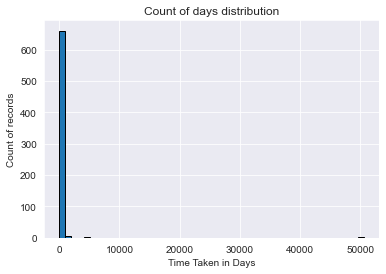

In [35]:
plt.hist(count_in_days, bins = 50, edgecolor = 'k');
plt.xlabel('Time Taken in Days'); plt.ylabel('Count of records'); 
plt.title('Count of days distribution')
plt.show()
#It's a highly skewed distribution of the time taken for various permits to be processed

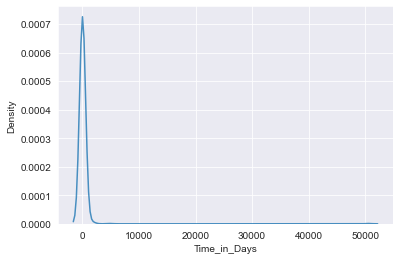

In [36]:
sns.kdeplot(data=count_in_days,shade=False,alpha=0.8)
plt.show() #gives a clear representation of skewness in the time in days taken by various permits

**Visualizing some categorical columns:Permit Type,Permit Type Definition,Current Status, Existing Construction Type **

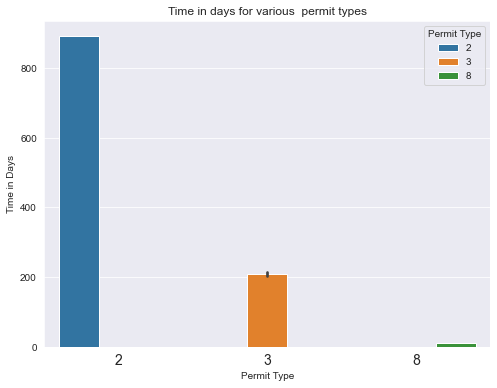

In [37]:
# Lets do some bivariate plotting
fig=plt.figure(figsize=(8,6))
sns.barplot(x=Pmtsdata['Permit Type'],y=Pmtsdata['Time_in_Days'],hue='Permit Type',data=Pmtsdata)
plt.xlabel('Permit Type')
plt.xticks(size=14)
plt.ylabel('Time in Days')
plt.title('Time in days for various  permit types')

plt.show();

It can be observed that Permit type of category 8 take the least time to process,followed by permit type 3 while permit type 2  take the most time on average to process.

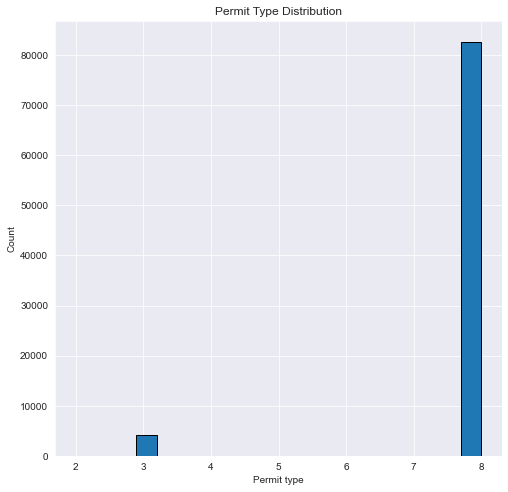

In [38]:
fig=plt.figure(figsize=(8, 8))
plt.hist(Pmtsdata['Permit Type'], bins = 20, edgecolor = 'black');
plt.xlabel('Permit type'); 
plt.ylabel('Count'); plt.title('Permit Type Distribution');

The histogram above shows that other permit types categories 2,4,5,6,7 do not have a significant count of records.
Permit types categories 8 and 3 are the common permit types to be issued.

Lets Explore the current status variable with emphasis to key values such as issued, revoked and incomplete permit applicatons.

In [44]:
Pmtdata1 =Pmtsdata[Pmtsdata['Current Status'].isin(['issued','revoked','incomplete']) ] 

In [45]:
Pmtdata1['Current Status'].head()

Permit Number
201301087513    issued
201301087513    issued
201302059458    issued
201302150374    issued
201302150374    issued
Name: Current Status, dtype: object

<Figure size 576x432 with 0 Axes>

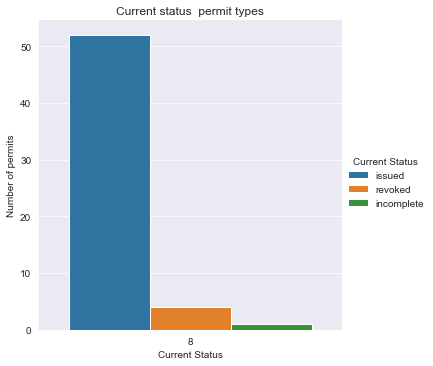

In [46]:
# plot both together to compare
fig=plt.figure(figsize=(8,6))
sns.catplot(x='Permit Type',hue='Current Status',kind='count',data=Pmtdata1)
plt.xlabel('Current Status')
plt.xticks()
plt.ylabel('Number of permits')
plt.title('Current status  permit types')
plt.xticks()
plt.show()

 **The Bar Graph above shows that there are more permits that are issued, a few permits that are revoked and a slight number of them that are incomplete meaning that there are more chances for a permit to be issued once all required documents have been submitted.**

<Figure size 576x432 with 0 Axes>

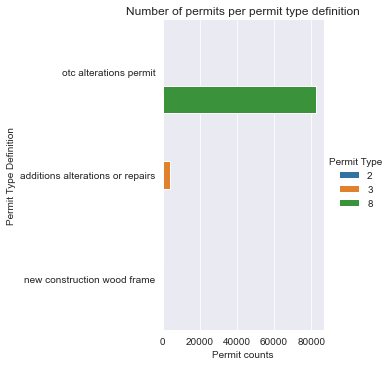

In [47]:
# A Count plot showing distribution of Permit Type Definition with permit types
fig=plt.figure(figsize=(8,6))
sns.catplot(y='Permit Type Definition',hue='Permit Type',kind='count',data=Pmtsdata)
plt.xlabel('Permit counts')
plt.xticks()
plt.ylabel('Permit Type Definition')
plt.title('Number of permits per permit type definition')
plt.show()

**Graph above shows that Alterations permits are the common permits type definition in the data with other permits definitions greatly skewed.**

<Figure size 576x432 with 0 Axes>

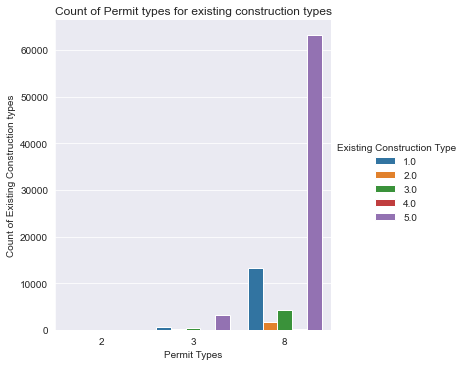

In [48]:
# plot both together to compare
fig=plt.figure(figsize=(8,6))
sns.catplot(x='Permit Type',hue='Existing Construction Type',kind='count',data=Pmtsdata)
plt.xlabel('Permit Types')
plt.ylabel('Count of Existing Construction types')
plt.title('Count of Permit types for existing construction types')
plt.xticks()
plt.show()

**The most construction types permits issued belong to Existing Construction type 5.0 which is reflected across the major permit types 8 and 3, then followed by construction type 1.0 ,3.0,2.0 and least number of permits belong to construction type 4.0.**

**Visualise highly skewed columns which include: estimated cost, revised cost, plansets. and decrease on thier skewness so as to produce better models.**

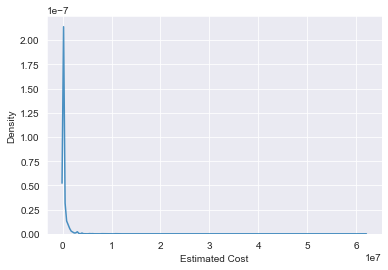

In [49]:
sns.kdeplot(data=Pmtsdata['Estimated Cost'] ,shade=False,alpha=0.8)
plt.show()
#graph below shows a skewed distribution to right

In [50]:
# Calculate first and third quartile
first_quartile = Pmtsdata['Estimated Cost'].describe()['25%']
third_quartile = Pmtsdata['Estimated Cost'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
Pmtsdata = Pmtsdata[(Pmtsdata['Estimated Cost'] > (first_quartile - 3 * iqr)) &
            (Pmtsdata['Estimated Cost'] < (third_quartile + 3 * iqr))]

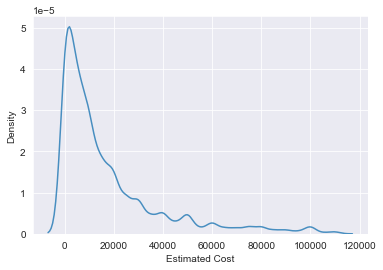

In [51]:
sns.kdeplot(data=Pmtsdata['Estimated Cost'] ,shade=False,alpha=0.8)
plt.show() #this shows a better shape with decreased skewness

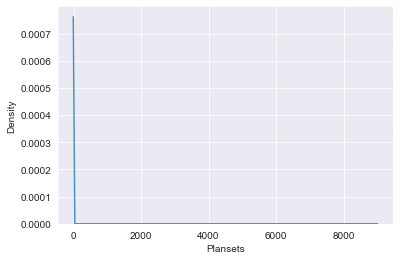

In [52]:
sns.kdeplot(data=Pmtsdata['Plansets'],shade=False,alpha=0.8)
plt.show()

In [53]:
# Calculate first and third quartile
first_quartile = Pmtsdata['Plansets'].describe()['25%']
third_quartile = Pmtsdata['Plansets'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
Pmtsdata = Pmtsdata[(Pmtsdata['Plansets'] > (first_quartile - 3 * iqr)) &
            (Pmtsdata['Plansets'] < (third_quartile + 3 * iqr))]

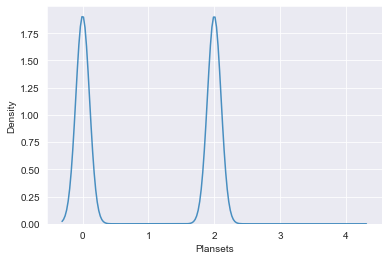

In [54]:
sns.kdeplot(data=Pmtsdata['Plansets'],shade=False,alpha=0.8)
plt.show()
#shows decrease in skewness

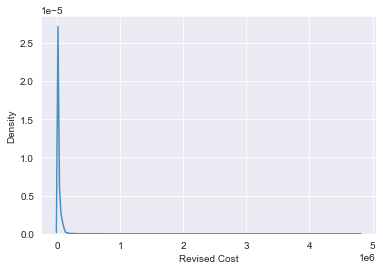

In [55]:
sns.kdeplot(data=Pmtsdata['Revised Cost'],shade=False,alpha=0.8)
plt.show()

In [56]:
# Calculate first and third quartile
first_quartile = Pmtsdata['Revised Cost'].describe()['25%']
third_quartile = Pmtsdata['Revised Cost'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
Pmtsdata = Pmtsdata[(Pmtsdata['Revised Cost'] > (first_quartile - 3 * iqr)) &
            (Pmtsdata['Revised Cost'] < (third_quartile + 3 * iqr))]

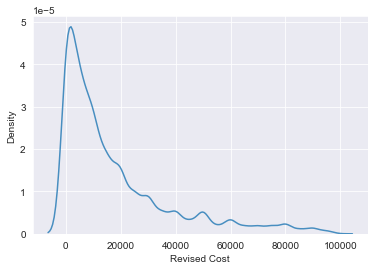

In [57]:
sns.kdeplot(data=Pmtsdata['Revised Cost'],shade=False,alpha=0.8)
plt.show()

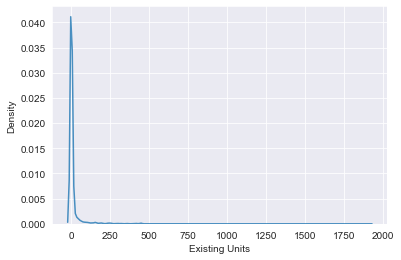

In [58]:
sns.kdeplot(data=Pmtsdata['Existing Units'],shade=False,alpha=0.8)
plt.show()

In [59]:
# Calculate first and third quartile
first_quartile = Pmtsdata['Existing Units'].describe()['25%']
third_quartile = Pmtsdata['Existing Units'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
Pmtsdata = Pmtsdata[(Pmtsdata['Existing Units'] > (first_quartile - 3 * iqr)) &
            (Pmtsdata['Existing Units'] < (third_quartile + 3 * iqr))]

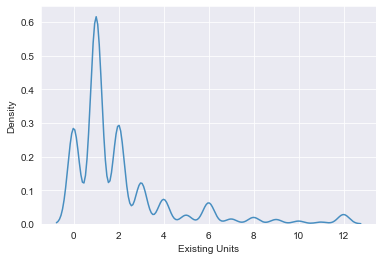

In [60]:
sns.kdeplot(data=Pmtsdata['Existing Units'],shade=False,alpha=0.8)
plt.show()

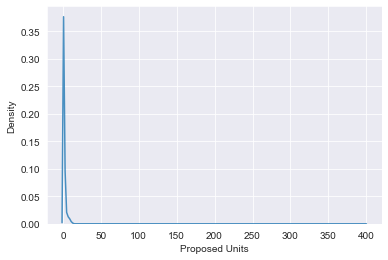

In [61]:
sns.kdeplot(data=Pmtsdata['Proposed Units'],shade=False,alpha=0.8)
plt.show()

In [62]:
# Calculate first and third quartile
first_quartile = Pmtsdata['Proposed Units'].describe()['25%']
third_quartile = Pmtsdata['Proposed Units'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
Pmtsdata =Pmtsdata[(Pmtsdata['Proposed Units'] > (first_quartile - 3 * iqr)) &
            (Pmtsdata['Proposed Units'] < (third_quartile + 3 * iqr))]

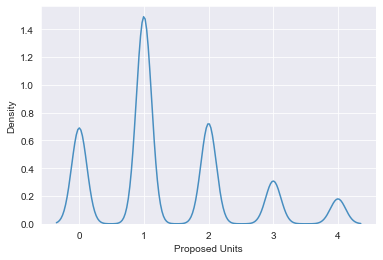

In [63]:
sns.kdeplot(data=Pmtsdata['Proposed Units'],shade=False,alpha=0.8)
plt.show()

In [64]:
Pmtsdata.shape #New shape after removing outliers.

(60597, 35)

In [65]:
correlation_matrix =Pmtsdata.corr()['Time_in_Days'].sort_values()

In [66]:
#printing the most negative and least correlations
correlation_matrix.head(7)

Permit Type                  -0.598427
Number of Existing Stories   -0.023739
Number of Proposed Stories   -0.023137
Existing Units               -0.020114
Record ID                    -0.014199
Zipcode                      -0.010964
Proposed Units               -0.006760
Name: Time_in_Days, dtype: float64

In [67]:
correlation_matrix.tail(7)

Proposed Construction Type    0.006561
Street Number                 0.010271
Supervisor District           0.015798
Estimated Cost                0.117912
Revised Cost                  0.165122
Plansets                      0.240864
Time_in_Days                  1.000000
Name: Time_in_Days, dtype: float64

In [68]:
types = (Pmtsdata['Permit Type'].value_counts())
types

8    58984
3     1612
2        1
Name: Permit Type, dtype: int64

In [69]:
types = list(types[types.values > 300].index)
types

[8, 3]

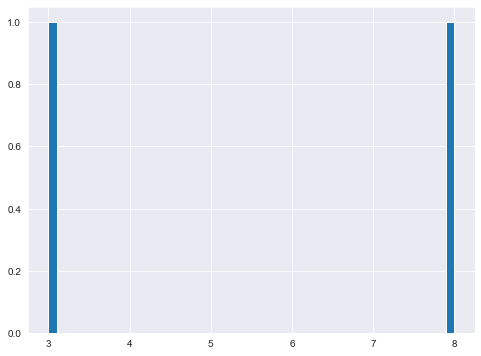

In [70]:
fig=plt.figure(figsize=(8,6))
plt.hist(types,bins=50)
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

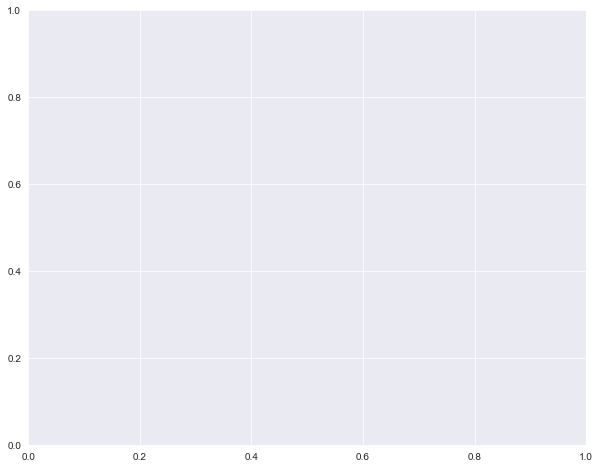

In [71]:
# Plot of distribution of time in days for permit types
plt.figure(figsize=(10,8))

# Plot each permit type
for p_type in types:
    
    # Select the permit type
    subset = Pmtsdata[Pmtsdata['Permit Type'] == p_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['Time_in_Days'],
               label = p_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Time in Days', size = 8); plt.ylabel('Density', size = 8); 
plt.title('Density Plot of Time in Days by Permit Type', size = 8);

In [ ]:
cat_col = ['Permit Type','Street Number','Existing Construction Type','Zipcode','Supervisor District']

In [ ]:
Pmtsdata[cat_col]=Pmtsdata[cat_col].astype('str')

In [72]:
Pmtsdata.dtypes # to verify that our data types

Permit Type                                        int64
Permit Type Definition                            object
Permit Creation Date                              object
Block                                             object
Lot                                               object
Street Number                                      int64
Street Name                                       object
Street Suffix                                     object
Description                                       object
Current Status                                    object
Current Status Date                               object
Filed Date                                datetime64[ns]
Issued Date                               datetime64[ns]
Completed Date                                    object
First Construction Document Date                  object
Number of Existing Stories                       float64
Number of Proposed Stories                       float64
Permit Expiration Date         

**Dropping of Filed Date and Issued dates since they are nolonger informative in our modelling,
We drop Record ID since  we already have a unique record identifier,
we also drop locationn since it's not so informative as we already have a supervisor district which gives us a hint on the area the building is located,
we also drop columns that could be colinear to other columns in the data and hence lead to overfitting
These include:Number of existing stories,estimated cost,existing units**

In [73]:
Pmtsdata.drop(columns =list(['Filed Date','Issued Date','Record ID','Location',
                           'Number of Existing Stories','Estimated Cost',
                           'Existing Units','Current Status']),axis=1,inplace=True) 

In [74]:
Pmtsdata.head(1)# shows that we have dropped the above mentioned columns.

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status Date,Completed Date,First Construction Document Date,Number of Proposed Stories,Permit Expiration Date,Revised Cost,Existing Use,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Time_in_Days
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,
201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,07/24/2017,07/24/2017,07/18/2017,2.0,07/13/2018,2000.0,1 family dwelling,1 family dwelling,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,253


In [75]:
Pmtsdata.shape

(60597, 27)

In [76]:
y=pd.DataFrame(Pmtsdata['Time_in_Days'])
X =Pmtsdata.drop(['Time_in_Days'],axis=1)

In [77]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality
categorical_cols = [cname for cname in X.columns 
                    if X[cname].nunique() < 10 and X[cname].dtype == "object"]

In [78]:
categorical_colsOH= pd.get_dummies(X[categorical_cols])

In [79]:
categorical_colsOH.shape

(60597, 13)

In [80]:
categorical_colsOH.head()

,Permit Type Definition_additions alterations or repairs,Permit Type Definition_new construction wood frame,Permit Type Definition_otc alterations permit,Existing Construction Type Description_constr type 1,Existing Construction Type Description_constr type 2,Existing Construction Type Description_constr type 3,Existing Construction Type Description_constr type 4,Existing Construction Type Description_wood frame (5),Proposed Construction Type Description_constr type 1,Proposed Construction Type Description_constr type 2,Proposed Construction Type Description_constr type 3,Proposed Construction Type Description_constr type 4,Proposed Construction Type Description_wood frame (5)
Permit Number,,,,,,,,,,,,,
201611072166,0,0,1,0,0,0,0,1,0,0,0,0,1
201710110928,0,0,1,0,0,0,0,1,0,0,0,0,1
201408254591,0,0,1,0,0,0,0,1,0,0,0,0,1
201604064066,0,0,1,0,0,0,0,1,0,0,0,0,1
201609097214,0,0,1,0,0,0,0,1,0,0,0,0,1


In [81]:
from sklearn.preprocessing import  StandardScaler
# Select numerical columns
numerical_cols = [cname for cname in X.columns 
                  if X[cname].dtype in ['int64', 'float64']]

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols] )

In [82]:
#The code below shows that the numerical columns have minimum skewness.
X[numerical_cols].skew(axis=0)

Permit Type                  -5.882186
Street Number                 1.454378
Number of Proposed Stories    3.948103
Revised Cost                  1.811621
Proposed Units                0.772550
Plansets                      0.090495
Existing Construction Type   -1.927534
Proposed Construction Type   -1.927197
Supervisor District          -0.070146
Zipcode                       0.589472
dtype: float64

In [83]:
numerical_data = pd.DataFrame(X[numerical_cols])

In [84]:
numerical_data.head()# taking a snapshot of the numerical data columns

,Permit Type,Street Number,Number of Proposed Stories,Revised Cost,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode
Permit Number,,,,,,,,,,
201611072166,0.165365,0.123829,-0.348707,-0.739745,-0.328465,1.046036,0.442387,0.442471,-0.962523,-0.860161
201710110928,0.165365,-0.130092,-0.348707,-0.136529,-0.328465,-0.955848,0.442387,0.442471,1.053794,1.991866
201408254591,0.165365,-0.890985,-0.212318,-0.815147,2.489731,-0.955848,0.442387,0.442471,0.045636,-1.544648
201604064066,0.165365,-0.438797,-0.348707,-0.428083,-0.328465,1.046036,0.442387,0.442471,-1.634629,0.508812
201609097214,0.165365,-0.692718,-0.485096,-0.347655,-0.328465,-0.955848,0.442387,0.442471,0.381689,1.763704


In [85]:
features =pd.concat([categorical_colsOH, numerical_data],axis=1) 

In [86]:
features.head()

,Permit Type Definition_additions alterations or repairs,Permit Type Definition_new construction wood frame,Permit Type Definition_otc alterations permit,Existing Construction Type Description_constr type 1,Existing Construction Type Description_constr type 2,Existing Construction Type Description_constr type 3,Existing Construction Type Description_constr type 4,Existing Construction Type Description_wood frame (5),Proposed Construction Type Description_constr type 1,Proposed Construction Type Description_constr type 2,Proposed Construction Type Description_constr type 3,Proposed Construction Type Description_constr type 4,Proposed Construction Type Description_wood frame (5),Permit Type,Street Number,Number of Proposed Stories,Revised Cost,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode
Permit Number,,,,,,,,,,,,,,,,,,,,,,,
201611072166,0,0,1,0,0,0,0,1,0,0,0,0,1,0.165365,0.123829,-0.348707,-0.739745,-0.328465,1.046036,0.442387,0.442471,-0.962523,-0.860161
201710110928,0,0,1,0,0,0,0,1,0,0,0,0,1,0.165365,-0.130092,-0.348707,-0.136529,-0.328465,-0.955848,0.442387,0.442471,1.053794,1.991866
201408254591,0,0,1,0,0,0,0,1,0,0,0,0,1,0.165365,-0.890985,-0.212318,-0.815147,2.489731,-0.955848,0.442387,0.442471,0.045636,-1.544648
201604064066,0,0,1,0,0,0,0,1,0,0,0,0,1,0.165365,-0.438797,-0.348707,-0.428083,-0.328465,1.046036,0.442387,0.442471,-1.634629,0.508812
201609097214,0,0,1,0,0,0,0,1,0,0,0,0,1,0.165365,-0.692718,-0.485096,-0.347655,-0.328465,-0.955848,0.442387,0.442471,0.381689,1.763704


In [87]:
features.shape

(60597, 23)

In [88]:
# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1, ))

In [89]:
# Break off test set from training data
X_train, X_test, y_train, y_test =train_test_split(features,y,test_size=0.2,random_state=0)

In [90]:
X_train.shape

(48477, 23)

In [91]:
X_test.shape

(12120, 23)

In [92]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [93]:
#Now we can make the median guess and evaluate it on the test set to obtain our baseline model
baseline_guess = np.median(y)
#This shows our average estimate on the test set is off by about 13 points. 
#The Time in days can take on any values, the average error from a naive method if about 13%. 
#The naive method of guessing the median training value provides us a low baseline for our models to beat

print('The baseline guess of number of days taken: %0.2f days' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess of number of days taken: 0.00 days
Baseline Performance on the test set: MAE = 13.7809


In [94]:
# function to  train a given  model and evaluate it on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [95]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 14.5299


In [96]:
random_forest = RandomForestRegressor(random_state=0)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 13.6862


In [97]:
gradient_boosted = GradientBoostingRegressor(random_state=4)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 13.8818


In [98]:
# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

#loss function to be minimized
loss = ['ls', 'lad', 'huber']

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]
#how much the contribution of each tree will shrink.

learning_rate = [0.005,0.01,0.05,0.1,0.5]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

In [99]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'learning_rate':learning_rate,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}


In [100]:
#model for optimization
model = GradientBoostingRegressor()

In [101]:
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=30, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [102]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.8min


KeyboardInterrupt: 

In [ ]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)
random_results.head(5)

In [ ]:
random_cv.best_estimator_

In [ ]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100,200,300,400,500, 1500, 2000,2500]}
model =  GradientBoostingRegressor( max_depth =3,
                                   loss='lad',
                                   learning_rate=0.5,
                                  min_samples_split = 6,
                                  max_features = 'log2',
                                  random_state = 42)


In [ ]:
# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 5, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Test_Err')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Train_Err')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend("best");
plt.title('Performance vs Number of Trees');

In [ ]:
results.sort_values('mean_test_score', ascending = False).head(5)

In [ ]:
#default model
defaultmodelGBR = GradientBoostingRegressor()

In [ ]:
# Select the best model
final_modelGBR = grid_search.best_estimator_
final_modelGBR

In [ ]:
from pprint import pprint
# Select the best parameters for best estimator
pprint(grid_search.best_estimator_.get_params())

In [ ]:
from time import time

In [ ]:
%%timeit -n 1 -r 5
defaultmodelGBR.fit(X_train, y_train)

In [ ]:
%%timeit -n 1 -r 5
final_modelGBR.fit(X_train, y_train)

In [ ]:
default_pred = defaultmodelGBR.predict(X_test)
final_pred = final_modelGBR.predict(X_test)
print('Default model performance on the test set: MAE = %0.2f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.2f.' % mae(y_test, final_pred))

To get a sense of the predictions, we can plot the distribution of true values on the test set and the predicted values on the test set

In [ ]:
plt.figure(figsize=(8, 6)) 

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Time in days'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

The distribution is highly skewed with the density of the predicted values closer to the median of the test values rather than the actual peak. It appears the model might be less accurate at predicting the extreme values and instead predict values further away from the median

Another diagnostic plot is a histogram of the residuals. Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low)

In [ ]:
plt.figure(figsize = (6, 6))

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'green', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

The residuals are far from a  normal distribution, with noticeable outliers on both sides of the low and high end. These indicate errors where the model estimate was far below that of the true value

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(final_modelGBR, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

**CONCLUSSIONS:**

**There are a key issues that we draw from the San Francisco Building Permits data:**

**1.Permit type of category 8 which involve alterations in buildings tend to matter the most and normally tend to take the least time literary in hours for the permit to be issued on average, then followed by permit type of category 3**

**It's important to note that some permit types of category 2 takes the most time on average to process upto 3 years.**

**It can be noted that the city's most existing construction type fall in the category of type 5.0 then followed by construction type 1.0.**

# **Finally**
 
# Using the given San Franscisco Building Permits data, a machine learning model can predict the The time taken for a permit to be processed to within 10 points.
#     The five most important variables for determining the Time taken for a permit to be issued being:Permit Type_8,Permit Type Definition_additions alterations or repairs Permit Type, Definition_otc alterations permit,Permit Type_3  and Plansets 